<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/12_CNN/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

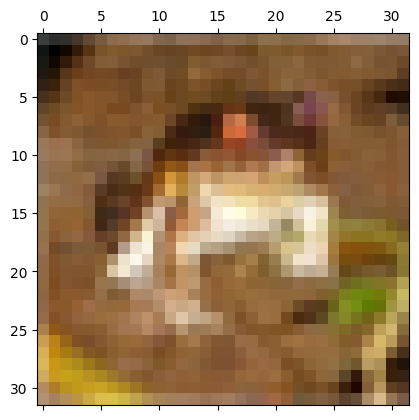

In [9]:
plt.matshow(X_train[0])

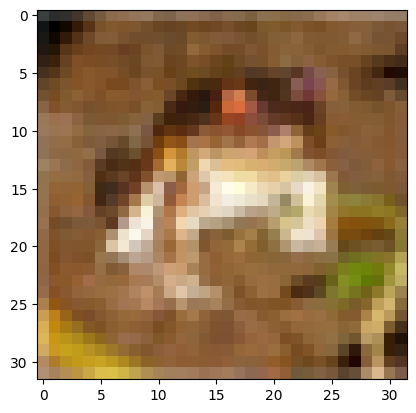

In [10]:
plt.imshow(X_train[0])

A function to plot the data

In [11]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train = y_train.reshape(-1,) # don't want to change the first dimension that's why -1 and after comma nothing should be in there to flatten that array just to get the number

In [15]:
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_train[0]

6

Function Call

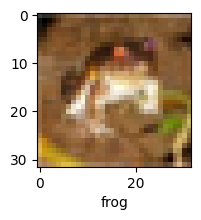

In [17]:
plot_sample(X_train, y_train, 0)

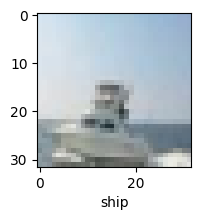

In [18]:
plot_sample(X_train, y_train, 100)

In [19]:
# data exploration part is done
# now we need to do is normalize our data

X_train = X_train/255
X_test = X_test/255

We will build a simple ANN first

In [20]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), #input layer
    #hidden layer
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), #relu for hidden layer
    #output layer will have 10 neurons as I will have 10 classes and need to use sigmoid actiavation function
    #if you don't mention this it will go linear, won't use any activation function
    keras.layers.Dense(10, activation='softmax')
])



ann.compile(optimizer='SGD',  #Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)
# if y is one hot encoded then use categorical cross entropy
# if y is representing integer value, then use sparse categorical crossentropy

Epoch 1/5
1563/1563 [==============================] - 140s 88ms/step - loss: 1.8116 - accuracy: 0.3542
Epoch 2/5
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6236 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5415 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4807 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4311 - accuracy: 0.4950


In [21]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.4399 - accuracy: 0.4851


[1.4399313926696777, 0.48510000109672546]

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [23]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 18s 55ms/step


In [31]:
y_pred

array([[0.01299617, 0.03485365, 0.11073996, ..., 0.00426286, 0.09356192,
        0.00541222],
       [0.03443426, 0.21160725, 0.00387957, ..., 0.00160223, 0.4125518 ,
        0.32724652],
       [0.16450098, 0.12182628, 0.00850611, ..., 0.00670181, 0.5777677 ,
        0.10625644],
       ...,
       [0.00170625, 0.00093066, 0.12133003, ..., 0.03080381, 0.01490257,
        0.00353044],
       [0.01189751, 0.01201776, 0.14163509, ..., 0.03628864, 0.01035587,
        0.00718033],
       [0.0446421 , 0.00820439, 0.11940532, ..., 0.39508918, 0.0159811 ,
        0.01334484]], dtype=float32)

In [35]:
np.argmax(y_pred[1])

8

In [36]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [37]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.40      0.50      1000
           1       0.63      0.61      0.62      1000
           2       0.40      0.30      0.35      1000
           3       0.35      0.34      0.35      1000
           4       0.47      0.35      0.40      1000
           5       0.49      0.27      0.34      1000
           6       0.38      0.75      0.50      1000
           7       0.55      0.56      0.56      1000
           8       0.48      0.76      0.59      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



**Using CNN Model**

In [45]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32,  kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,  kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# difference between softmax and sigmoid would be that softmax will normalize your probability
# sigmoid :
  # class 1 :0.47
  # class 2: 0.72
# softmax :
  # class 1: 0.47/(0.47+0.72)
  # class 2: 0.72/(0.47+0.72)



In [39]:
0.47/(0.47+0.72)

0.3949579831932773

In [40]:
0.72/(0.47+0.72)

0.6050420168067226

In [46]:
cnn.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5152 - accuracy: 0.4579
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1840 - accuracy: 0.5825
Epoch 3/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0588 - accuracy: 0.6274
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9729 - accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.9128 - accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8602 - accuracy: 0.7011
Epoch 7/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8145 - accuracy: 0.7173
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7744 - accuracy: 0.7296
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7398 - accuracy: 0.7416
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [48]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9075 - accuracy: 0.6931


[0.907468855381012, 0.6930999755859375]

In [49]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 20ms/step


array([[5.21048065e-03, 5.29619690e-04, 4.66641933e-02, 7.16803730e-01,
        3.61963711e-03, 1.33619040e-01, 9.25810710e-02, 6.04366614e-05,
        6.13635872e-04, 2.98232451e-04],
       [4.12905449e-03, 3.06472387e-02, 6.71012970e-07, 6.68167445e-07,
        5.16912962e-07, 1.17111306e-07, 2.99187386e-09, 6.10230799e-08,
        9.64066267e-01, 1.15533196e-03],
       [1.53490648e-01, 1.15302391e-01, 3.31686903e-03, 1.86533772e-03,
        1.91258464e-03, 5.59746462e-04, 1.17740165e-04, 1.25892377e-02,
        6.39101565e-01, 7.17438534e-02],
       [8.47132206e-01, 6.00307658e-02, 2.37558153e-03, 3.70498514e-04,
        2.37032212e-03, 5.86608576e-06, 2.83804329e-05, 5.09723439e-04,
        8.70488957e-02, 1.27748688e-04],
       [1.33222642e-07, 1.22775111e-06, 7.24336598e-04, 5.14463056e-03,
        9.59097087e-01, 1.10989250e-03, 3.39155979e-02, 6.23801100e-07,
        6.50676247e-06, 6.43673825e-09]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [51]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

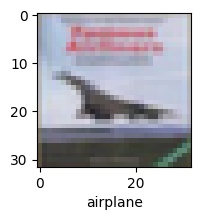

In [52]:
plot_sample(X_test, y_test,3)

In [54]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.84      0.78      0.81      1000
           2       0.64      0.55      0.59      1000
           3       0.56      0.44      0.49      1000
           4       0.63      0.61      0.62      1000
           5       0.57      0.60      0.58      1000
           6       0.71      0.82      0.76      1000
           7       0.70      0.79      0.74      1000
           8       0.78      0.80      0.79      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

